#Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import libraries

In [ ]:
seed=42
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import scipy
import scipy.stats

#Load data

In [ ]:
train_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/S/training_centra_peaks_N.npy')
train_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_centra_peaks_S.npy')
train_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_centra_peaks_V.npy')
train_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_V.npy',allow_pickle=True)
train_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_N.npy',allow_pickle=True)
train_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_S.npy',allow_pickle=True)


val_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_N.npy')
val_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_S.npy')
val_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_centra_peaks_V.npy')
val_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_V.npy',allow_pickle=True)
val_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_N.npy',allow_pickle=True)
val_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_S.npy',allow_pickle=True)


test_central_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_N.npy')
test_central_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_S.npy')
test_central_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_centra_peaks_V.npy')
test_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_V.npy',allow_pickle=True)
test_single_peaks_N = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_N.npy',allow_pickle=True)
test_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_S.npy',allow_pickle=True)

#NORMALIZE 0-1

In [ ]:
def normalize_01(train_single_peaks_V):
  train_single_peaks_V_new=[]
  for i in range(train_single_peaks_V.shape[0]):
    minimo=np.min(train_single_peaks_V[i])
    massimo=np.max(train_single_peaks_V[i])
    train_single_peaks_V_new.append((train_single_peaks_V[i]-minimo)/(massimo-minimo))
  return np.array(train_single_peaks_V_new)

In [ ]:
V=normalize_01(train_single_peaks_V)
N=normalize_01(train_single_peaks_N)
S=normalize_01(train_single_peaks_S)

#extract features

In [ ]:
def entropy(signal,bins=256):
  # Compute the histogram of the signal values
  histogram, _ = np.histogram(signal, bins=bins, density=True)

  # Compute the probabilities of each bin
  probabilities = histogram / np.sum(histogram)

  # Compute entropy using the Shannon entropy formula
  entropy_value = -np.sum(probabilities * np.log2(probabilities + 1e-10))

  return entropy_value

def extract_features(N,central_peaks):
  media=[]
  stand_dev=[]
  rms=[]
  entr=[]
  diff_prec_succ=[]
  diff_ampiezze=[]
  kurtosis_full=[]
  skewness_full=[]
  for i in range(N.shape[0]):
    media.append(np.mean(N[i]))
    stand_dev.append(np.std(N[i]))
    rms.append((np.sum(N[i]**2)/N[i].shape[0])**0.5)
    diff_prec_succ.append([central_peaks[i], N[i].shape[0]-central_peaks[i]])
    diff_ampiezze.append([N[i][0]-N[i][central_peaks[i]],N[i][-1]-N[i][central_peaks[i]]])
    entr.append(entropy(N[i]))

    kurtosis_full.append(scipy.stats.kurtosis(N[i]))
    skewness_full.append(scipy.stats.skew(N[i]))

  return np.array(media),np.array(stand_dev),np.array(rms),np.array(entr),np.array(diff_prec_succ),np.array(diff_ampiezze),np.array(kurtosis_full),np.array(skewness_full)

In [ ]:
media_V,stand_dev_V,rms_V,entr_V,diff_p_s_V,diff_amp_V,kurt_V,skew_V=extract_features(V,train_central_peaks_V)
media_N,stand_dev_N,rms_N,entr_N,diff_p_s_N,diff_amp_N,kurt_N,skew_N=extract_features(N,train_central_peaks_N)
media_S,stand_dev_S,rms_S,entr_S,diff_p_s_S,diff_amp_S,kurt_S,skew_S=extract_features(S,train_central_peaks_S)

#Exploratory data analysis
metrics reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10561251/

##mean

Text(0, 0.5, 'Number of samples')

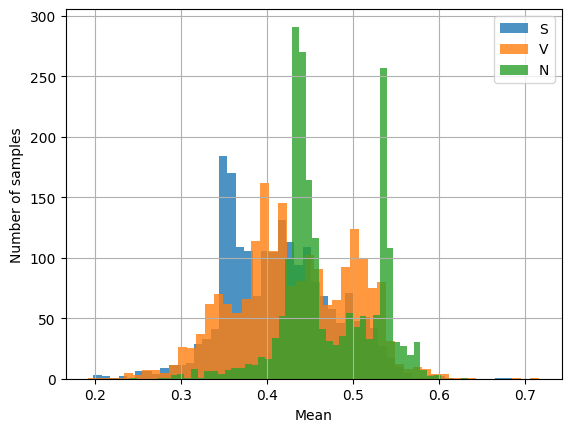

In [ ]:
media_N_norm=media_N[:2000]
media_V_norm=media_V[:2000]
media_S_norm=media_S[:2000]
plt.figure
plt.hist(media_S_norm,bins=50,alpha=0.8)
plt.hist(media_V_norm,bins=50,alpha=0.8)
plt.hist(media_N_norm,bins=50,alpha=0.8)
plt.grid()
plt.legend(['S','V','N'])
plt.xlabel('Mean')
plt.ylabel('Number of samples')

##root mean square

Text(0, 0.5, 'Number of samples')

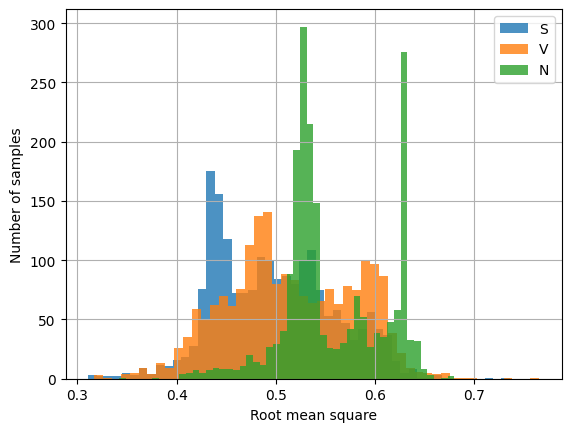

In [ ]:
rms_N_norm=rms_N[:2000]
rms_V_norm=rms_V[:2000]
rms_S_norm=rms_S[:2000]
plt.figure
plt.hist(rms_S_norm,bins=50,alpha=0.8)
plt.hist(rms_V_norm,bins=50,alpha=0.8)
plt.hist(rms_N_norm,bins=50,alpha=0.8)
plt.grid()
plt.legend(['S','V','N'])
plt.xlabel('Root mean square')
plt.ylabel('Number of samples')

##standard deviation

Text(0, 0.5, 'Number of samples')

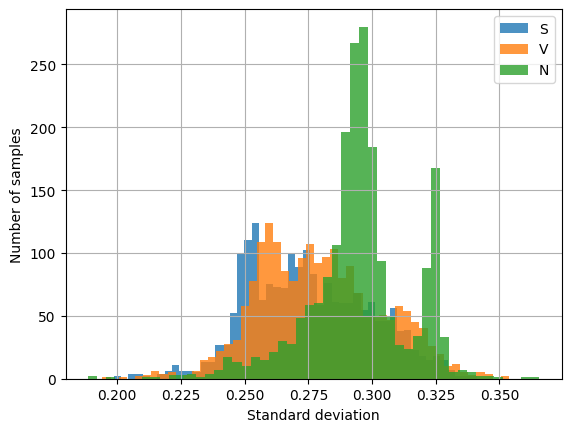

In [ ]:
stand_dev_N_norm=stand_dev_N[:2000]
stand_dev_V_norm=stand_dev_V[:2000]
stand_dev_S_norm=stand_dev_S[:2000]
plt.figure
plt.hist(stand_dev_S_norm,bins=50,alpha=0.8)
plt.hist(stand_dev_V_norm,bins=50,alpha=0.8)
plt.hist(stand_dev_N_norm,bins=50,alpha=0.8)
plt.grid()
plt.legend(['S','V','N'])
plt.xlabel('Standard deviation')
plt.ylabel('Number of samples')

##kurtosis

(-2.0, 2.0)

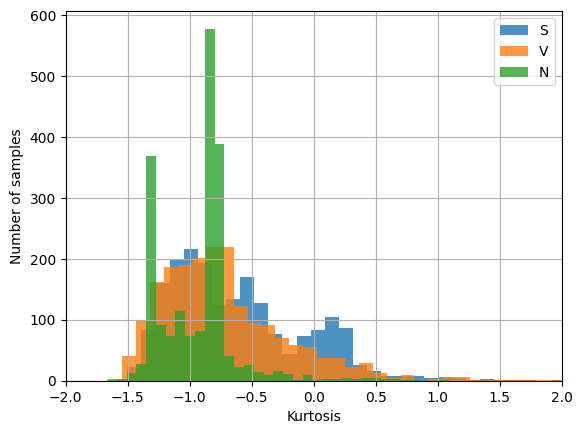

In [ ]:
kurt_N_norm=kurt_N[:2000]
kurt_V_norm=kurt_V[:2000]
kurt_S_norm=kurt_S[:2000]
plt.figure
plt.hist(kurt_S_norm,bins=50,alpha=0.8)
plt.hist(kurt_V_norm,bins=50,alpha=0.8)
plt.hist(kurt_N_norm,bins=50,alpha=0.8)
plt.grid()
plt.legend(['S','V','N'])
plt.xlabel('Kurtosis')
plt.ylabel('Number of samples')
plt.xlim([-2,2])

##skewness

(-1.5, 2.0)

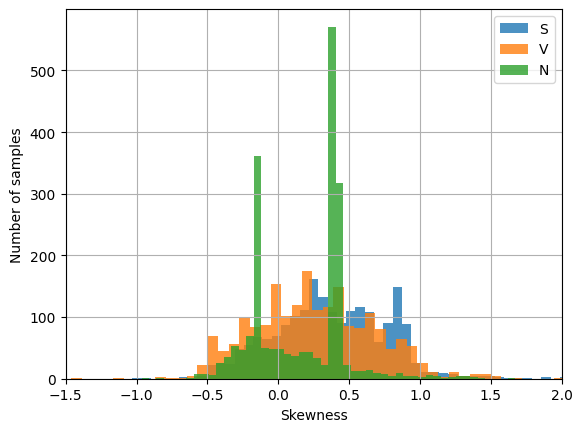

In [ ]:
skew_N_norm=skew_N[:2000]
skew_V_norm=skew_V[:2000]
skew_S_norm=skew_S[:2000]
plt.figure
plt.hist(skew_S_norm,bins=50,alpha=0.8)
plt.hist(skew_V_norm,bins=50,alpha=0.8)
plt.hist(skew_N_norm,bins=50,alpha=0.8)
plt.grid()
plt.legend(['S','V','N'])
plt.xlabel('Skewness')
plt.ylabel('Number of samples')
plt.xlim([-1.5,2])

##Difference in time

Text(0, 0.5, '∆T_i [samples]')

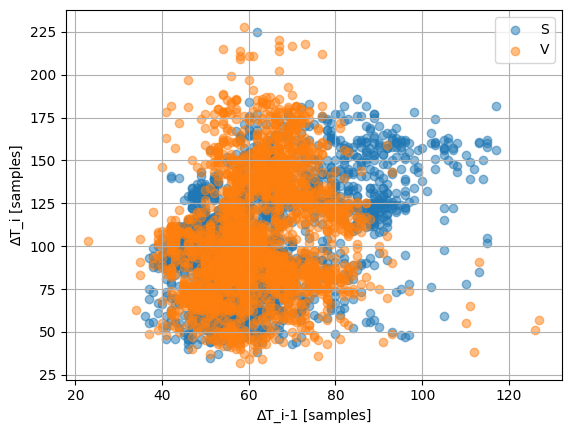

In [ ]:
plt.figure
plt.scatter(diff_p_s_S[:,0],diff_p_s_S[:,1],alpha=0.5)
plt.scatter(diff_p_s_V[:,0],diff_p_s_V[:,1],alpha=0.5)
plt.grid()
plt.legend(['S','V'])
plt.xlabel('∆T_i-1 [samples]')
plt.ylabel('∆T_i [samples]')

Text(0, 0.5, '∆T_i [samples]')

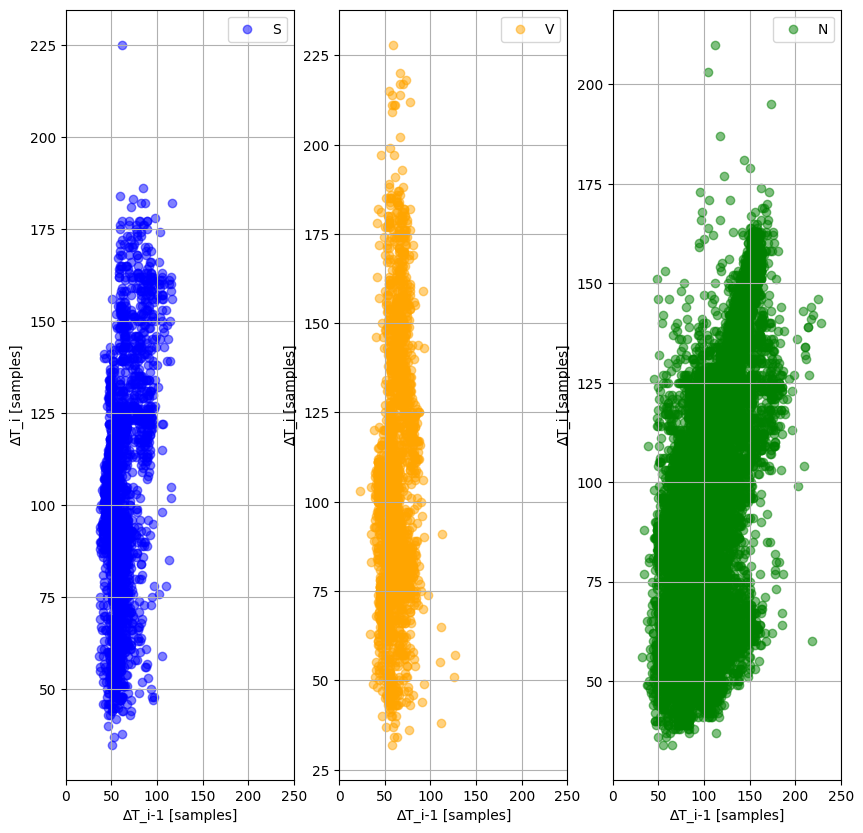

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.scatter(diff_p_s_S[:,0],diff_p_s_S[:,1],alpha=0.5,color='blue')
plt.xlim([0,250])
plt.grid()
plt.legend(['S'])
plt.xlabel('∆T_i-1 [samples]')
plt.ylabel('∆T_i [samples]')
plt.subplot(1,3,2)
plt.scatter(diff_p_s_V[:,0],diff_p_s_V[:,1],alpha=0.5,color='orange')
plt.xlim([0,250])
plt.grid()
plt.legend(['V'])
plt.xlabel('∆T_i-1 [samples]')
plt.ylabel('∆T_i [samples]')
plt.subplot(1,3,3)
plt.scatter(diff_p_s_N[:,0],diff_p_s_N[:,1],alpha=0.5,color='green')
plt.xlim([0,250])
plt.grid()
plt.legend(['N'])
plt.xlabel('∆T_i-1 [samples]')
plt.ylabel('∆T_i [samples]')

##Difference in amplitude

Text(0, 0.5, '∆A_i [samples]')

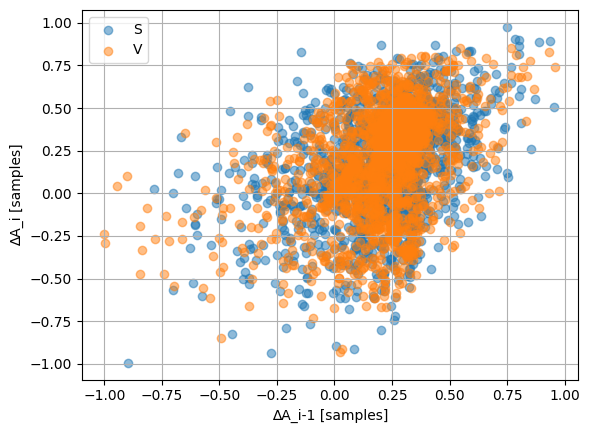

In [ ]:
plt.figure
plt.scatter(diff_amp_S[:,0],diff_amp_S[:,1],alpha=0.5)
plt.scatter(diff_amp_V[:,0],diff_amp_V[:,1],alpha=0.5)
plt.grid()
plt.legend(['S','V'])
plt.xlabel('∆A_i-1 [samples]')
plt.ylabel('∆A_i [samples]')

Text(0, 0.5, '∆A_i [samples]')

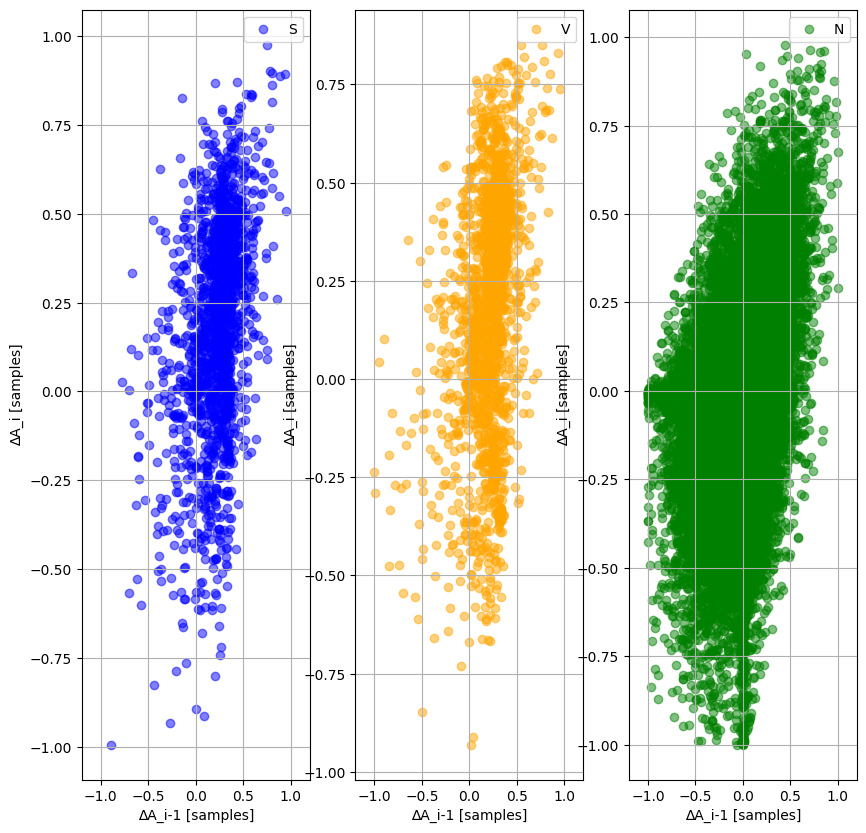

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.scatter(diff_amp_S[:,0],diff_amp_S[:,1],alpha=0.5,color='blue')
plt.xlim([-1.2,1.2])
plt.grid()
plt.legend(['S'])
plt.xlabel('∆A_i-1 [samples]')
plt.ylabel('∆A_i [samples]')
plt.subplot(1,3,2)
plt.scatter(diff_amp_V[:,0],diff_amp_V[:,1],alpha=0.5,color='orange')
plt.xlim([-1.2,1.2])
plt.grid()
plt.legend(['V'])
plt.xlabel('∆A_i-1 [samples]')
plt.ylabel('∆A_i [samples]')
plt.subplot(1,3,3)
plt.scatter(diff_amp_N[:,0],diff_amp_N[:,1],alpha=0.5,color='green')
plt.xlim([-1.2,1.2])
plt.grid()
plt.legend(['N'])
plt.xlabel('∆A_i-1 [samples]')
plt.ylabel('∆A_i [samples]')

#save variables

In [ ]:
train_V=normalize_01(train_single_peaks_V)
train_N=normalize_01(train_single_peaks_N)
train_S=normalize_01(train_single_peaks_S)

val_V=normalize_01(val_single_peaks_V)
val_N=normalize_01(val_single_peaks_N)
val_S=normalize_01(val_single_peaks_S)

test_V=normalize_01(test_single_peaks_V)
test_N=normalize_01(test_single_peaks_N)
test_S=normalize_01(test_single_peaks_S)

In [ ]:
for (peak,central_peak,nome) in [(train_V,train_central_peaks_V,'train_V'),
                                 (train_N,train_central_peaks_N,'train_N'),
                                 (train_S,train_central_peaks_S,'train_S'),

                                 (val_V,val_central_peaks_V,'val_V'),
                                 (val_N,val_central_peaks_N,'val_N'),
                                 (val_S,val_central_peaks_S,'val_S'),

                                 (test_V,test_central_peaks_V,'test_V'),
                                 (test_N,test_central_peaks_N,'test_N'),
                                 (test_S,test_central_peaks_S,'test_S')
                                 ]:
  media,stand_dev,rms,entr,diff_p_s,diff_amp,kurt,skew=extract_features(peak,central_peak)

  directory='/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/'
  np.save(directory+'media_'+nome+'.npy', media)
  np.save(directory+'stand_dev_'+nome+'.npy', stand_dev)
  np.save(directory+'rms_'+nome+'.npy', rms)
  np.save(directory+'entr_'+nome+'.npy', entr)
  np.save(directory+'diff_p_s_'+nome+'.npy', diff_p_s)
  np.save(directory+'diff_amp_'+nome+'.npy', diff_amp)
  np.save(directory+'kurt_'+nome+'.npy', kurt)
  np.save(directory+'skew_'+nome+'.npy', skew)
